In [27]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [28]:
# for Datareader parameters
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [29]:
#use vars() to convert strings to variable
tickers=["BAC","C","GS","JPM","MS","WFC"]
li=[]
for sym in tickers:
    vars()[sym]=data.DataReader(sym,"yahoo",start,end)
    li.append(vars()[sym])
 

In [34]:
#concats list li on horizontally
bank_stocks=pd.concat(li,axis=1,keys=tickers)

In [35]:
bank_stocks.columns.names=["Bank ticker","Stock Info"]

In [37]:
bank_stocks.head()

Bank ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.717861  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   35.338535  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   35.384048  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   35.330940  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   35.353695  487.399994  483.000000  486.000000  483.899994  ...   

Bank ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  38.006454  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  38.032536  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  38.136818  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  38.175922  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  38.580029  31.825001  31.555000   

Bank ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  21.246769  
2006-01-04   31.799999  31.530001  10870000.0  21.000326  
2006-01-05   31.500000  31.495001  10158000.0  20.977020  
2006-01-06   31.580000  31.680000   8403800.0  21.100231  
2006-01-09   31.674999  31.674999   5619600.0  21.096903  

[5 rows x 36 columns]

# EDA

In [38]:
#Max Close Price of Banks of all time 
bank_stocks.xs("Close",axis=1,level=1).max()

Bank ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [39]:
#created an Empty DataFrame
returns = pd.DataFrame()

In [40]:
#percent changes in Closing price of Banks 
for sym in tickers:
    returns[sym+" return"]=bank_stocks[sym]["Close"].pct_change()
returns.head()

BAC return  C return  GS return  JPM return  MS return  WFC return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110
2006-01-06   -0.001501  0.000000   0.014169    0.007046   0.001025    0.005874
2006-01-09    0.000644 -0.004731   0.012030    0.016242   0.010586   -0.000158

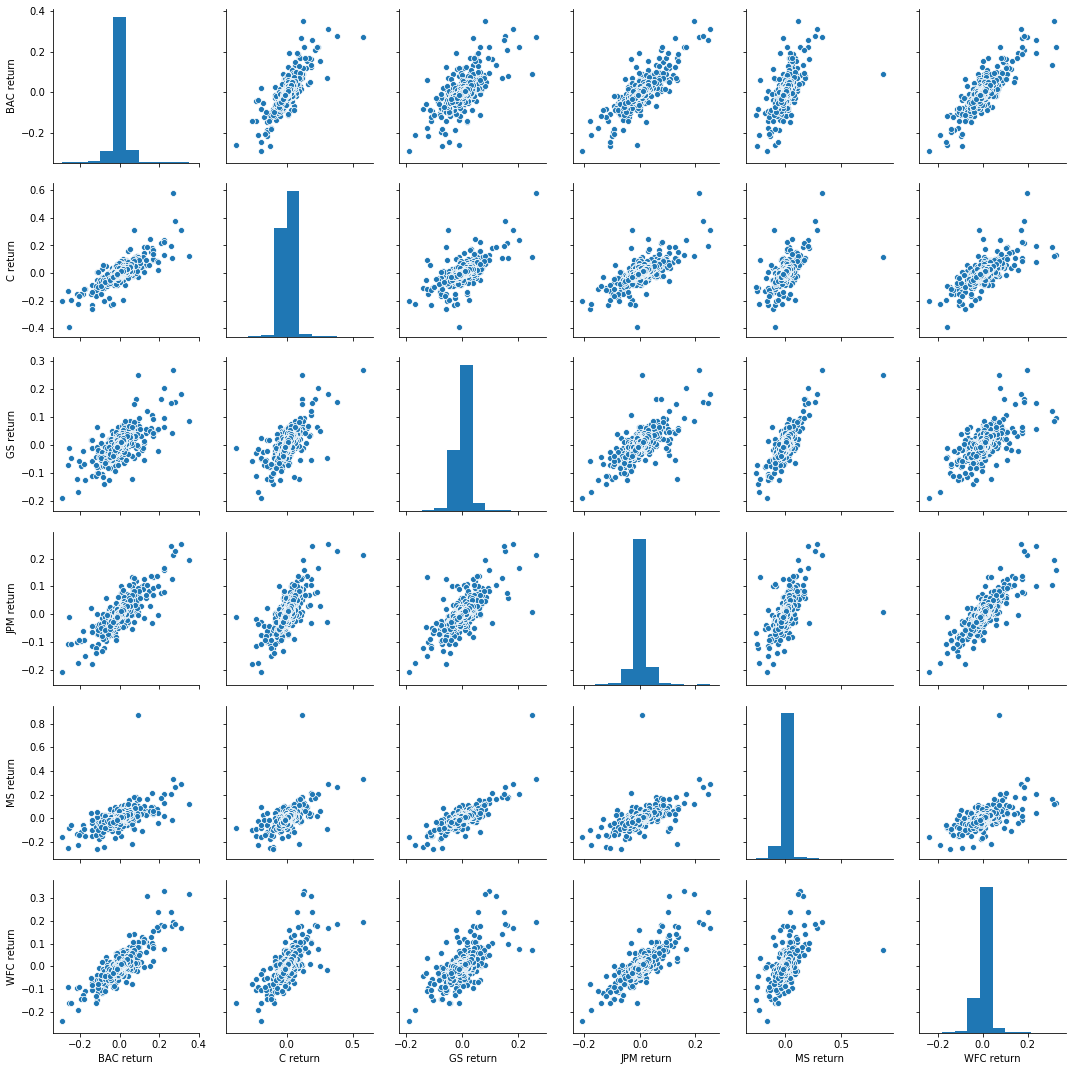

In [41]:
#Here we can see Citi Groups has a weird scatter plots because of reccesion 
import seaborn as sns
sns.pairplot(returns[1:])

In [42]:
# Worst Drop (4 of them on Inauguration day)
#fetching Date of Poor Performing Day
returns.idxmin()


BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [61]:
#citigroup stock split in May 2011, but also JPM day after inauguration and MS too
#fetching Date of best Performing Day
returns.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

### We can see how MS Bank has worst and best performing Day Very Close to each other it is becasue

In [44]:
returns.std() # Citigroup,MS riskiest as standard daaiviation is more with respect to all of them.

BAC return    0.036647
C return      0.038672
GS return     0.025390
JPM return    0.027667
MS return     0.037819
WFC return    0.030238
dtype: float64

In [45]:
returns.loc["2015-1-1":"2016-1-1"].std() #Very similar risk profiles, but Morgan Stanley or Bac in 2015

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

In [46]:
import matplotlib.pyplot as plt

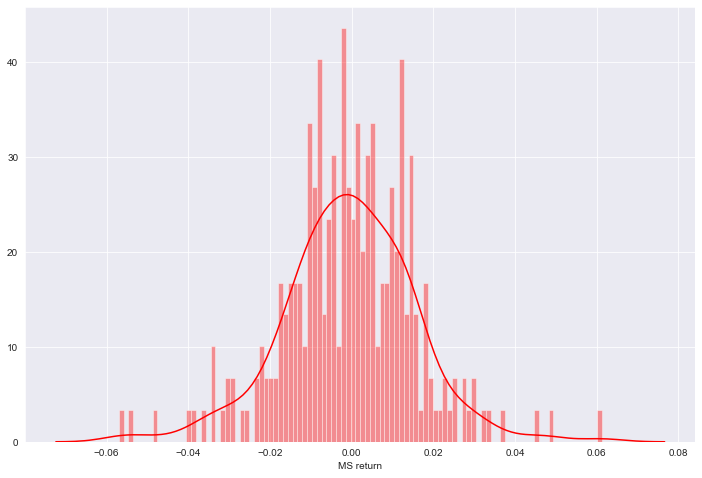

In [47]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
sns.distplot(returns.loc["2015-1-1":"2016-1-1"]["MS return"],color="red",bins=100,)

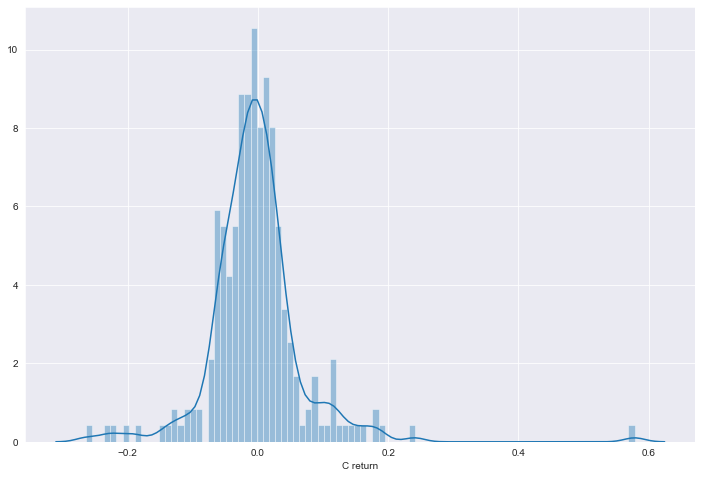

In [48]:
plt.figure(figsize=(12,8))

sns.distplot(returns.loc["2008-1-1":"2009-1-1"]["C return"],bins=90)

# More Visualization

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

4.2.1


<Figure size 864x576 with 0 Axes>

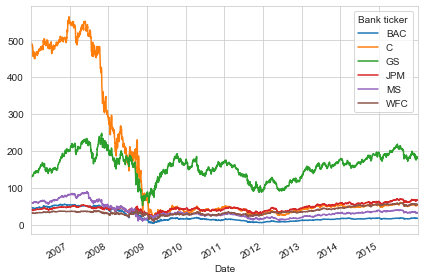

In [50]:
plt.figure(figsize=(12,8))
bank_stocks.xs(key="Close",level=1,axis=1).plot()
plt.tight_layout()

In [51]:
#Plotly
bank_stocks.xs(key='Close',axis=1,level=1).iplot()

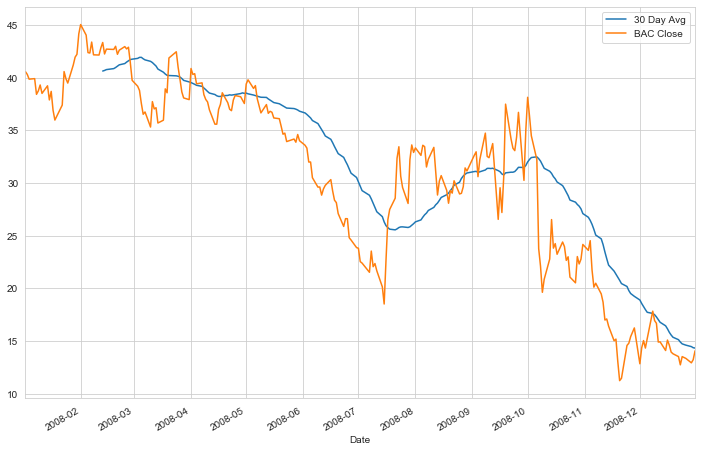

In [52]:
#Moving Average
plt.figure(figsize=(12,8))
bank_stocks["BAC"].loc["2008-1-1":"2009-1-1"]["Close"].rolling(window=30).mean().plot(label="30 Day Avg")
bank_stocks["BAC"].loc["2008-1-1":"2009-1-1"]["Close"].plot(label="BAC Close")
plt.legend()

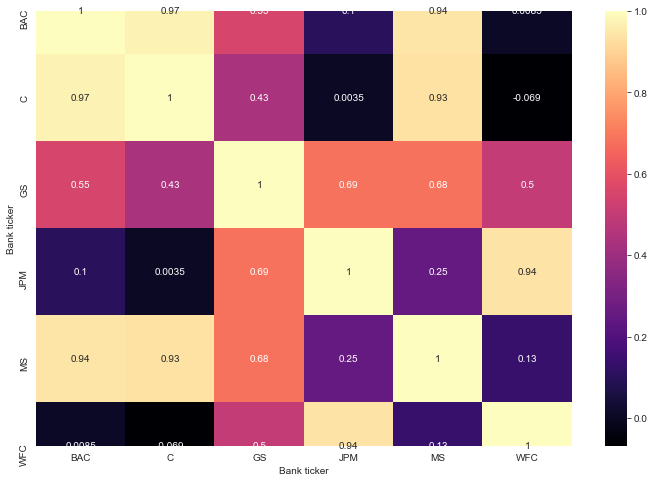

In [53]:
plt.figure(figsize=(12,8))
bank_cor=bank_stocks.xs(key="Close",level=1,axis=1).corr()
sns.heatmap(bank_cor,cmap="magma",annot=True)

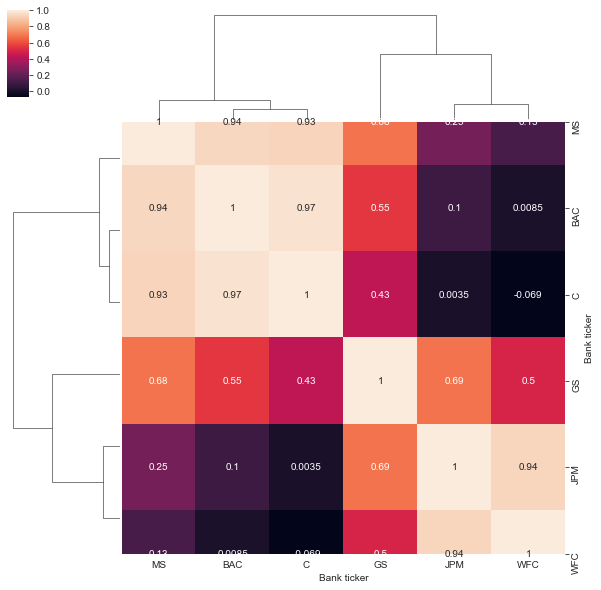

In [54]:
sns.clustermap(bank_cor,annot=True)

In [57]:
bank_cor.iplot(kind="heatmap")

In [62]:
#candle Plot
bank_stocks["BAC"].loc["2015-1-1":"2016-1-1"].iplot(kind="candle")

In [59]:
bank_stocks["MS"].loc["2015-1-1":"2016-1-1"].ta_plot(study="sma")

In [60]:
BAC.loc["2015-1-1":"2016-1-1"].ta_plot(study="boll")

# Made By Ratnakar Maurya